* Model 1 - **Basic CNN Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#data extraction
import os
import zipfile

train_zip_path = "/content/drive/MyDrive/DL_CNN/training_set.zip"
test_zip_path = "/content/drive/MyDrive/DL_CNN/test_set.zip"
extract_path = "/content/dataset"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")

Extraction complete!


In [ ]:
import matplotlib.pyplot as plt
import cv2

image_path = "/content/dataset/test_set/test_set/dogs/dog.4003.jpg"  # Update this if needed
image = cv2.imread(image_path)

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")
plt.show()

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
print(tensorflow.__version__)

2.18.0


In [ ]:
img_width, img_height = 150,150  #width and height of the image in dataset
train_data_dir = r"/content/dataset/training_set/training_set"
validation_data_dir=r"/content/dataset/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

In [ ]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)


test_datagen=ImageDataGenerator (rescale=1. /255)


train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])
# binary : twoclasses , categorical : multiclasses

validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


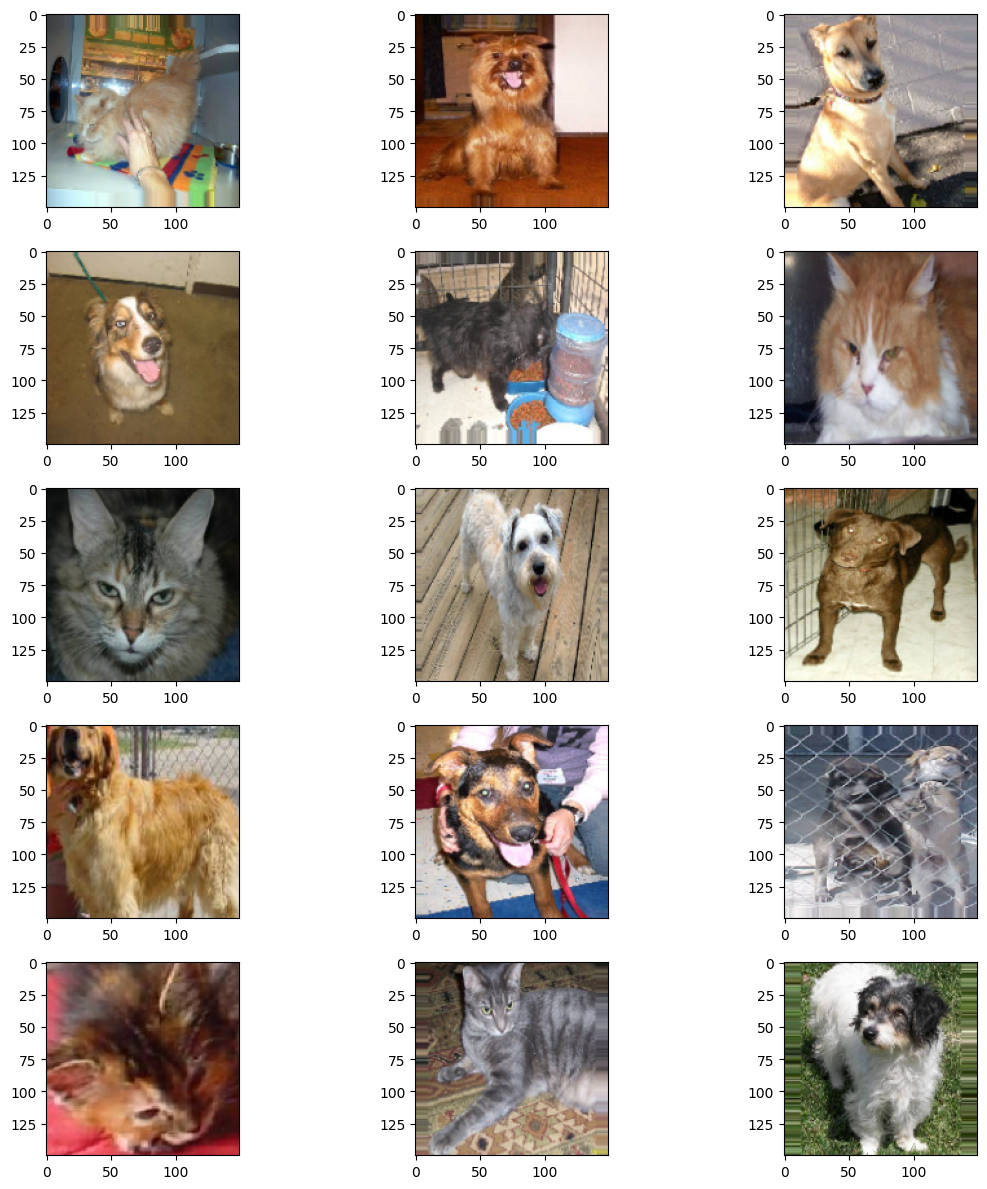

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons with 3*3 filter

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #MaxPooling2D helps to reduce the size of the data
model.add(Flatten()) #Converts multi dimensional array to 1D channel
model.add(Dense(64)) #64 neurons with 3*3 filter
model.add(Activation('relu'))
model.add(Dense(1)) #output layer
model.add(Activation('sigmoid')) #sigmoid activation function
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 148, 148, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 350464)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      22,429,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 148, 148, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 350464)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      22,429,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training = model.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.5168 - loss: 2.7187 - val_accuracy: 0.5270 - val_loss: 0.6687
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.6042 - loss: 0.6709 - val_accuracy: 0.6620 - val_loss: 0.6231
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 185ms/step - accuracy: 0.6339 - loss: 0.6511 - val_accuracy: 0.6645 - val_loss: 0.6169
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.6492 - loss: 0.6426 - val_accuracy: 0.7015 - val_loss: 0.5956
Epoch 5/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6000 - loss: 0.6278

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.6000 - loss: 0.6278 - val_accuracy: 0.6975 - val_loss: 0.5933
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.6682 - loss: 0.6321 - val_accuracy: 0.7010 - val_loss: 0.5776
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.6623 - loss: 0.6212 - val_accuracy: 0.6200 - val_loss: 0.6621
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.6768 - loss: 0.6134 - val_accuracy: 0.6950 - val_loss: 0.5884
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 206ms/step - accuracy: 0.6802 - loss: 0.5982 - val_accuracy: 0.7030 - val_loss: 0.5783
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.6500 - loss: 0.5759 - val_accuracy: 0.6980 - val_loss: 0.5707
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.6710 - loss: 0.6077 - val_accuracy: 0.7005 - val_loss: 0.5761
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 207ms/step - accuracy: 0.7064 - loss: 0.5822 - val_

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


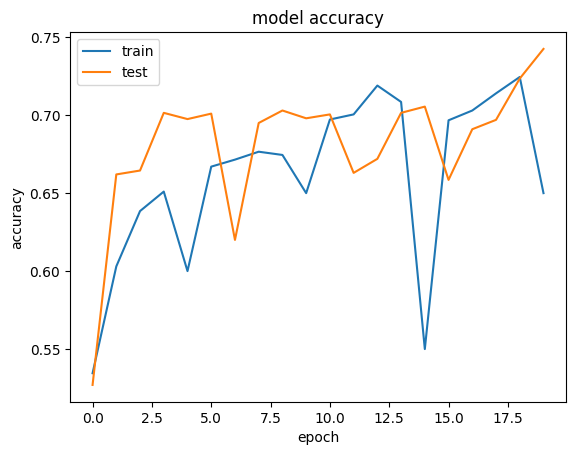

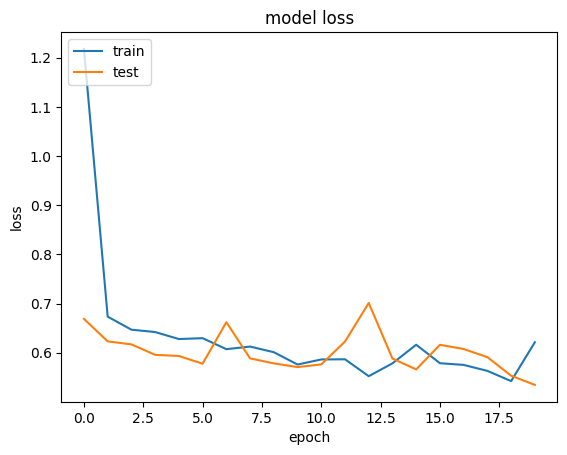

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step
[[0.]]
Prediction:  Cat


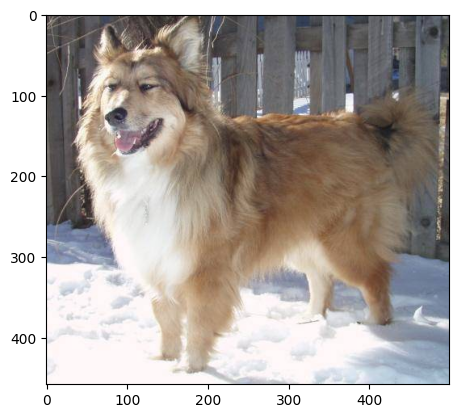

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/dataset/test_set/test_set/dogs/dog.4006.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/dataset/test_set/test_set/dogs/dog.4006.jpg')
imgplot = plt.imshow(img)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.]]
Prediction:  Cat


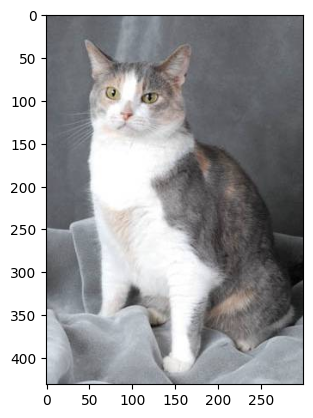

In [ ]:
img_pred = image.load_img("/content/dataset/test_set/test_set/cats/cat.4041.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/dataset/test_set/test_set/cats/cat.4041.jpg')
imgplot = plt.imshow(img)
plt.show()


* Model 2 - **Adding Dropouts to base CNN model**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

model2 = Sequential()
model2 = Sequential()
model2.add(Conv2D(64,(3,3),input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))
model2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 148, 148, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 350464)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │      22,429,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 148, 148, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 350464)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │      22,429,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training = model2.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.4752 - loss: 3.6429 - val_accuracy: 0.5400 - val_loss: 0.6908 - learning_rate: 0.0010
Epoch 2/20
  5/100 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5295 - loss: 0.6936

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.5288 - loss: 0.6915 - val_accuracy: 0.5815 - val_loss: 0.6894 - learning_rate: 0.0010
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.5184 - loss: 0.6922 - val_accuracy: 0.5370 - val_loss: 0.6781 - learning_rate: 0.0010
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 146ms/step - accuracy: 0.5527 - loss: 0.6845 - val_accuracy: 0.6220 - val_loss: 0.6554 - learning_rate: 0.0010
Epoch 5/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7000 - loss: 0.6607

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7000 - loss: 0.6607 - val_accuracy: 0.6205 - val_loss: 0.6573 - learning_rate: 0.0010
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.5953 - loss: 0.6768 - val_accuracy: 0.5895 - val_loss: 0.6682 - learning_rate: 0.0010
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.5822 - loss: 0.6666 - val_accuracy: 0.6505 - val_loss: 0.6448 - learning_rate: 0.0010
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 166ms/step - accuracy: 0.6351 - loss: 0.6516 - val_accuracy: 0.6135 - val_loss: 0.6604 - learning_rate: 0.0010
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 208ms/step - accuracy: 0.6461 - loss: 0.6459 - val_accuracy: 0.6580 - val_loss: 0.6391 - learning_rate: 0.0010
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6500 - loss: 0.6356 - val_accuracy: 0.6535 - val_loss: 0.6476 - learning_rate: 0.0010
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.6525 - loss: 0

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


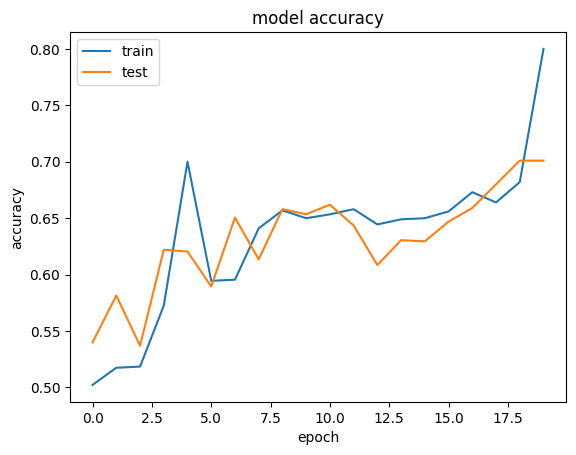

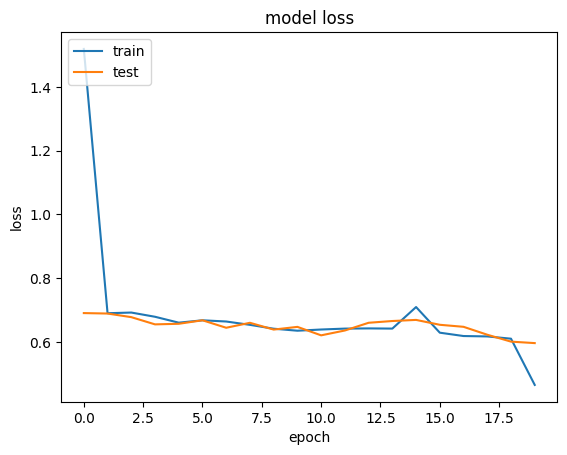

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[1.]]
Prediction:  Dog


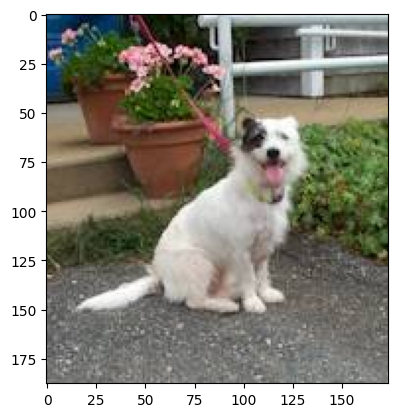

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/dataset/test_set/test_set/dogs/dog.4036.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/dataset/test_set/test_set/dogs/dog.4036.jpg')
imgplot = plt.imshow(img)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[1.]]
Prediction:  Dog


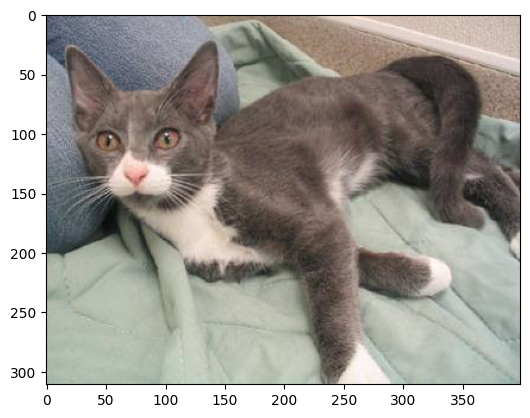

In [ ]:
img_pred = image.load_img("/content/dataset/test_set/test_set/cats/cat.4021.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/dataset/test_set/test_set/cats/cat.4021.jpg')
imgplot = plt.imshow(img)
plt.show()


* Model 3 - **Stacking of Layers**

In [ ]:
model3 = Sequential()

model3.add(Conv2D(32, (3,3), padding='same', input_shape=(150,150,3)))  # 32 filters, 3x3 kernel
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))  # Downsampling
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3,3), padding='same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3,3), padding='same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.3))

model3.add(Flatten())
model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(1))
model3.add(Activation('sigmoid'))

model3.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      10,617,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 10,712,513 (40.86 MB)

 Trainable params: 10,711,553 (40.86 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      10,617,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 10,712,513 (40.86 MB)

 Trainable params: 10,711,553 (40.86 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
training3 = model3.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 204ms/step - accuracy: 0.5838 - loss: 1.0203 - val_accuracy: 0.5005 - val_loss: 1.7889 - learning_rate: 0.0010
Epoch 2/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4500 - loss: 1.0028

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - accuracy: 0.5628 - loss: 0.8361 - val_accuracy: 0.5305 - val_loss: 1.3733 - learning_rate: 0.0010
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 236ms/step - accuracy: 0.5717 - loss: 0.7974 - val_accuracy: 0.5135 - val_loss: 0.8059 - learning_rate: 0.0010
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - accuracy: 0.6135 - loss: 0.7146 - val_accuracy: 0.5350 - val_loss: 0.8165 - learning_rate: 0.0010
Epoch 5/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6000 - loss: 0.6455

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6000 - loss: 0.6455 - val_accuracy: 0.5435 - val_loss: 0.8039 - learning_rate: 0.0010
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 170ms/step - accuracy: 0.6231 - loss: 0.6719 - val_accuracy: 0.5995 - val_loss: 0.7076 - learning_rate: 0.0010
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.6240 - loss: 0.6769 - val_accuracy: 0.6055 - val_loss: 0.7085 - learning_rate: 0.0010
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 186ms/step - accuracy: 0.6729 - loss: 0.6160 - val_accuracy: 0.6820 - val_loss: 0.5908 - learning_rate: 0.0010
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.7197 - loss: 0.5441 - val_accuracy: 0.7080 - val_loss: 0.5800 - learning_rate: 0.0010
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.7000 - loss: 0.7148 - val_accuracy: 0.7040 - val_loss: 0.5821 - learning_rate: 0.0010
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 167ms/step - accuracy: 0.6879 - loss: 0

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


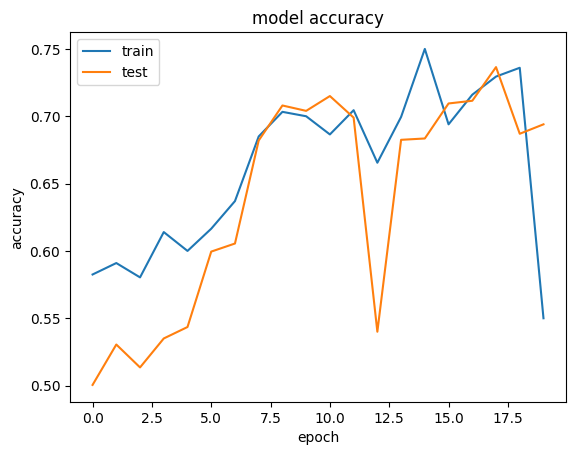

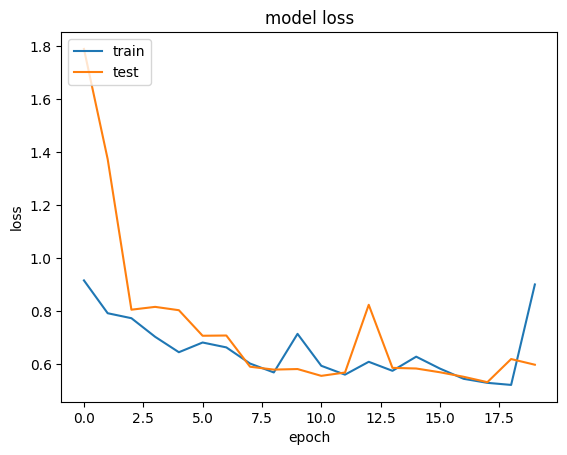

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training3.history.keys())
plt.plot(training3.history['accuracy'])
plt.plot(training3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(training3.history['loss'])
plt.plot(training3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[0.]]
Prediction:  Cat


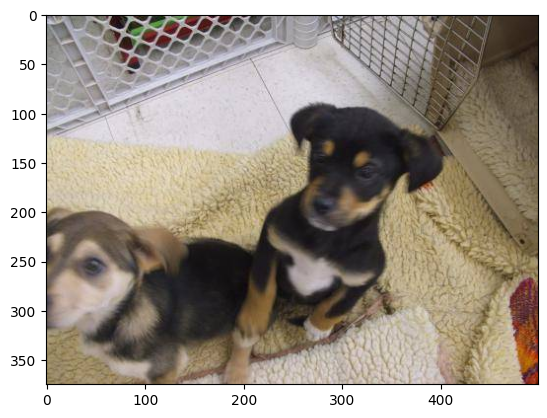

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/dataset/test_set/test_set/dogs/dog.4018.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model3.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/dataset/test_set/test_set/dogs/dog.4018.jpg')
imgplot = plt.imshow(img)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.]]
Prediction:  Cat


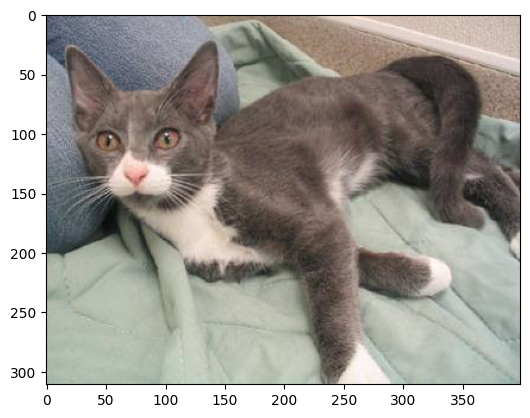

In [ ]:
img_pred = image.load_img("/content/dataset/test_set/test_set/cats/cat.4021.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model3.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/dataset/test_set/test_set/cats/cat.4021.jpg')
imgplot = plt.imshow(img)
plt.show()
